# 資料視覺化

這次主要是介紹 [Matplotlib](https://matplotlib.org) 這個 Python 最常被使用到的繪圖套件。 <br>

我們拿到資料，第一步一定會先看一下資料的狀態，我們會看資料的品質 **Data Quality** ，像是有沒有缺失資料，有沒有資料差異非常大等等，分佈阿等等，才會決定之後的的分析方法。




In [2]:
import pandas as pd
sample = pd.read_csv('../../files/sample_corr.csv')

sample


,x,y
0,1.105722,1.320945
1,1.158193,1.480131
2,1.068022,1.173479
3,1.131291,1.294706
4,1.125997,1.293024
5,1.037332,0.977393
6,1.051670,1.040798
7,0.971699,0.977604
8,1.102914,1.127956
9,1.164161,1.431070


## 視覺化 sample data

我們會使用 [Matplotlib](https://matplotlib.org) ，他是python 的一個好用的視覺化套件。



In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# 設定圖片大小
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.facecolor'] = 'w'



<AxesSubplot:xlabel='x', ylabel='y'>

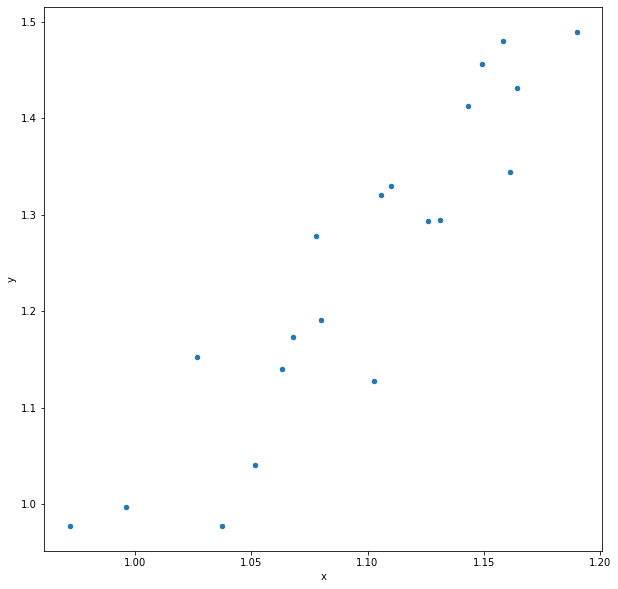

In [4]:
# 散點圖

sample.plot.scatter(x='x', y='y')


## 我們可以從資料視覺化的圖得到什麼?
- 快速吸收信息
- 提高洞察力
- 做出更快的決定


In [5]:
data = pd.read_csv('../../files/sample_height.csv')
data.head()

,height
0,129.150282
1,163.277930
2,173.965641
3,168.933825
4,171.075462


In [6]:
# 檢查有沒有缺失資料
data.isna().any()


height    False
dtype: bool

這邊提一下 我們的配色可以[參考](https://matplotlib.org/stable/tutorials/colors/colormaps.html)。

<AxesSubplot:ylabel='Frequency'>

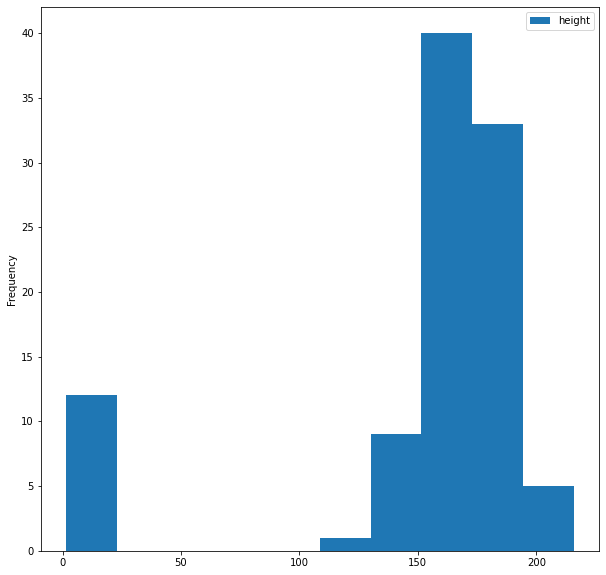

In [8]:
# 直方圖 histogram
data.plot.hist()
#data.plot.hist(cmap="coolwarm")


In [8]:
# 我們可以 filter 資料

data[data['height'] < 50]


,height
17,1.913196
22,1.629159
23,1.753424
27,1.854795
50,1.914587
60,1.642295
73,1.804588
82,1.573621
91,1.550227
94,1.660700


In [10]:
# 更多使用範例
import pandas as pd
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
print('The shape of X: ', X.shape, ' The shape of y: ', y.shape)

X_df = pd.DataFrame(X)
X_df.describe()


The shape of X:  (150, 4)  The shape of y:  (150,)


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:ylabel='Frequency'>

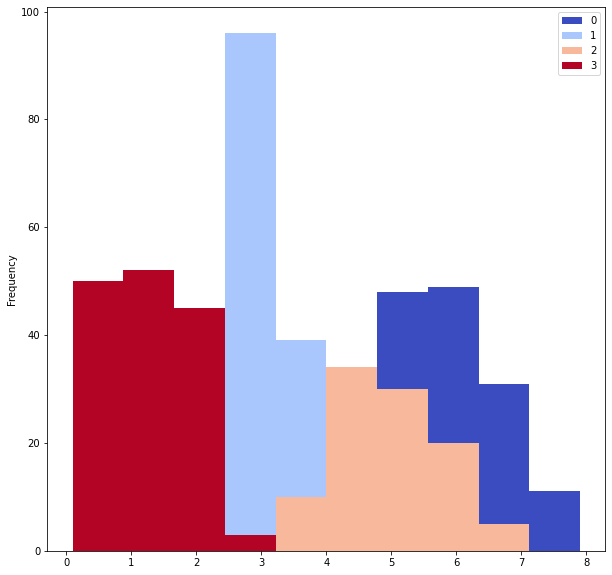

In [11]:

#X_df.plot.hist()
X_df.plot.hist(cmap="coolwarm")


<AxesSubplot:>

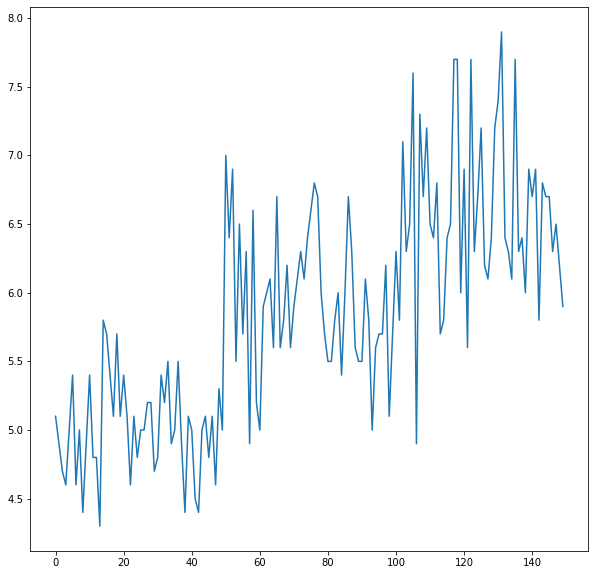

In [9]:
X_df[0].plot()

## 加 title 跟 labels

- ```title='Tilte'``` 加 title
- ```xlabel='X label'``` 加 X 軸 label
- ```ylabel='X label'``` 加 Y 軸 label

<AxesSubplot:title={'center':'Iris Data'}, xlabel='samples', ylabel='sepal length (cm)'>

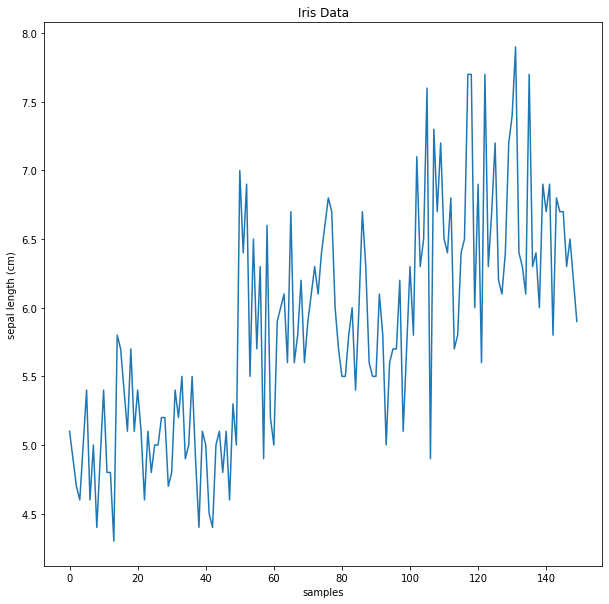

In [13]:

X_df[0].plot(title='Iris Data', ylabel='sepal length (cm)', xlabel='samples')


## 加軸的區間
- ```xlim=(min, max)``` or ```xlim=min``` : 設定 x 軸 的區間
- ```ylim=(min, max)``` or ```ylim=min``` : 設定 y 軸 的區間
  

<AxesSubplot:title={'center':'Iris Data'}, xlabel='samples', ylabel='sepal length (cm)'>

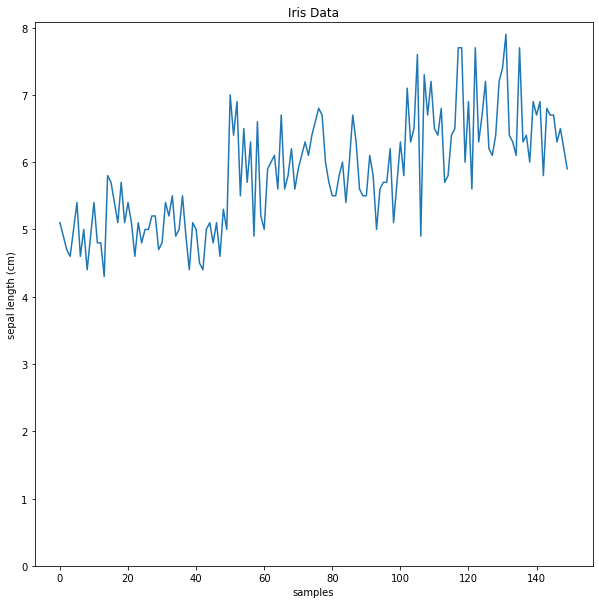

In [14]:
X_df[0].plot(title='Iris Data', ylabel='sepal length (cm)', xlabel='samples', ylim=0)

如果一次要顯示多筆資料，去比較

<AxesSubplot:>

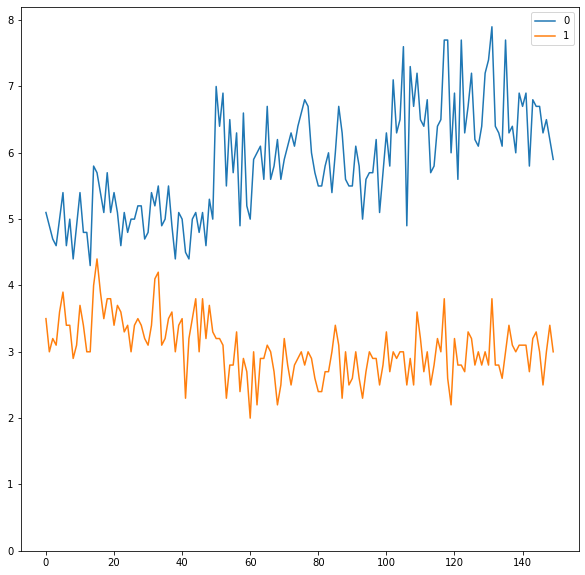

In [15]:
X_df[[0,1]].plot(ylim=0)

## 可以用 figsize 改變圖片大小
- ```figsize=(width, height)```

<AxesSubplot:>

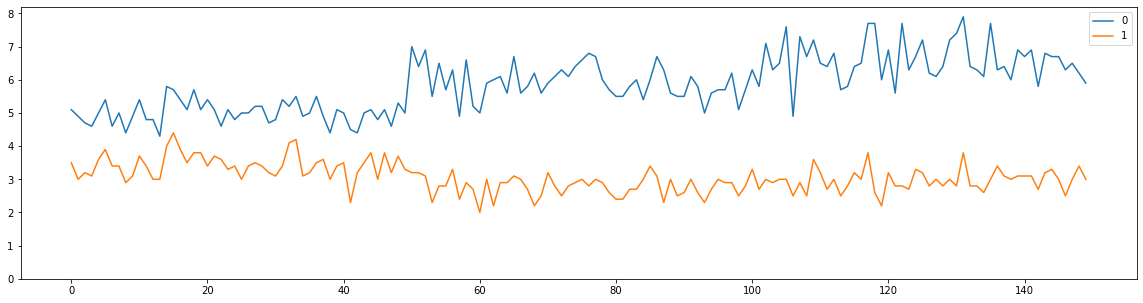

In [17]:
X_df[[0,1]].plot(ylim=0, figsize=(20,5))

## Bar plot 長條圖
- ```.plot.bar()```

<AxesSubplot:>

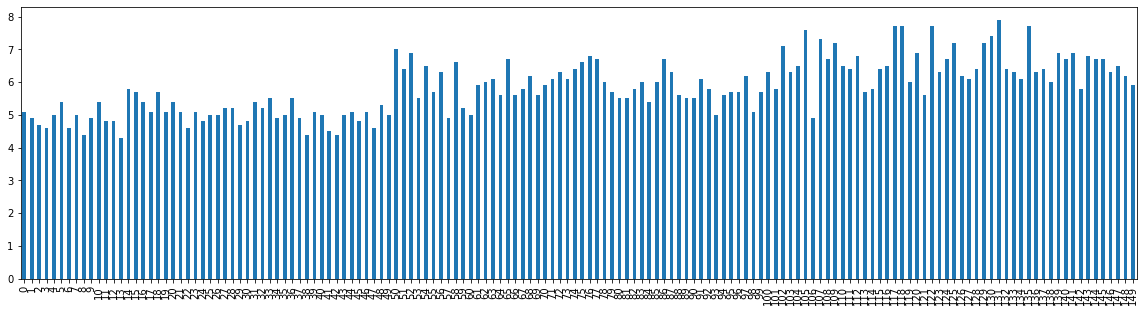

In [19]:
X_df[0].plot.bar(figsize=(20,5))

<AxesSubplot:>

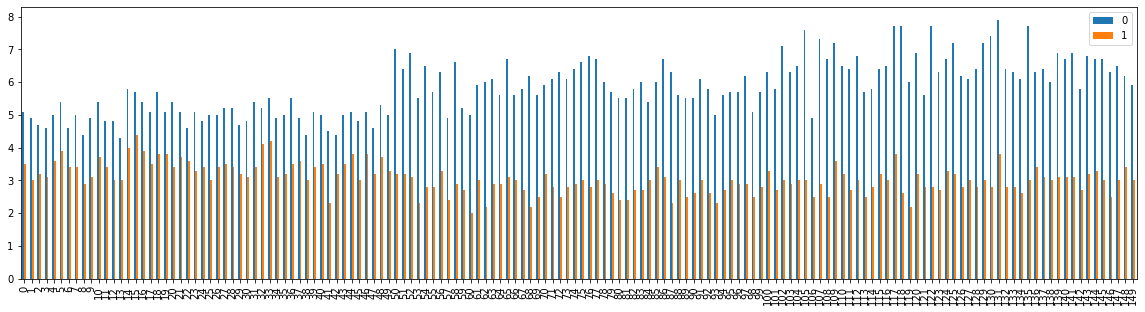

In [29]:
X_df[[0,1]].plot.bar(figsize=(20,5))

### Pie chart 圓餅圖
- ```.plot.pie()```

<AxesSubplot:ylabel='None'>

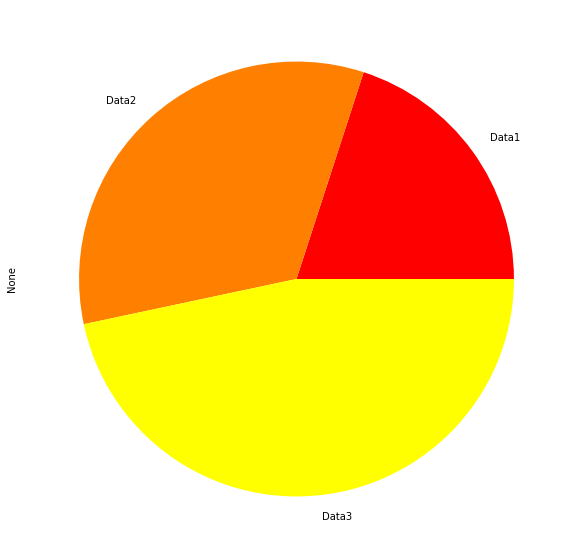

In [38]:
from filecmp import cmp

data = pd.Series(data=[3, 5, 7], index=['Data1', 'Data2', 'Data3'])
data.plot.pie(cmap='autumn')


<AxesSubplot:title={'center':'Iris per capita'}, ylabel='0'>

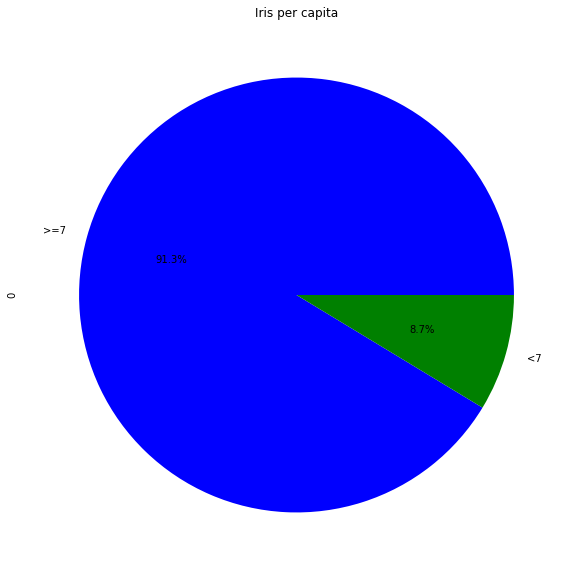

In [31]:
(X_df[0] < 7).value_counts().plot.pie(colors=['b', 'g'], labels=['>=7', '<7'], title='Iris per capita', autopct='%1.1f%%')

# subplot 與 subplots

下面要教怎麼一次畫多張圖
## subplot(行,列,位置)

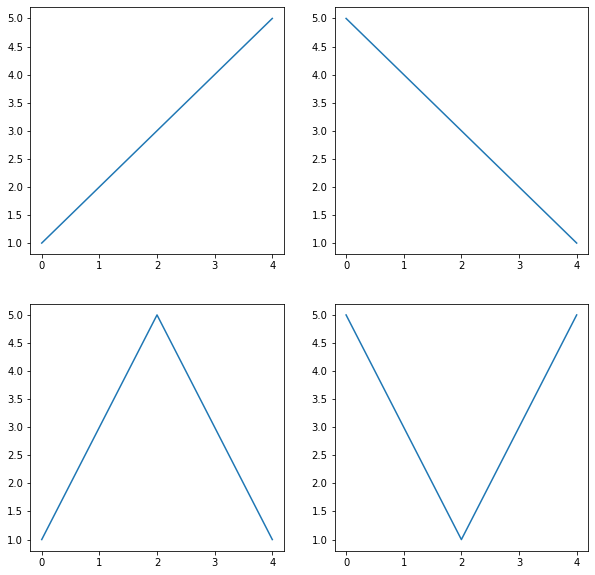

In [34]:
import matplotlib.pyplot as plt
x_1 = [1,2,3,4,5]
x_2 = [5,4,3,2,1]
x_3 = [1,3,5,3,1]
x_4 = [5,3,1,3,5]

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(x_1)
plt.subplot(222)
plt.plot(x_2)
plt.subplot(223)
plt.plot(x_3)
plt.subplot(224)
plt.plot(x_4)
plt.show()



<Figure size 720x720 with 0 Axes>

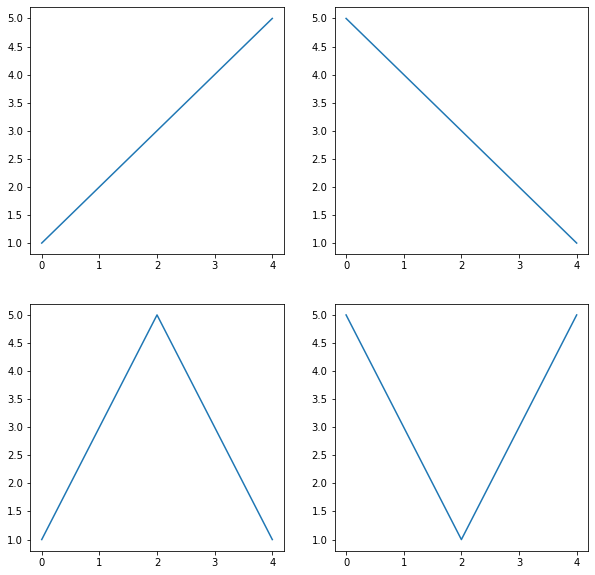

In [35]:
import matplotlib.pyplot as plt
x_1 = [1,2,3,4,5]
x_2 = [5,4,3,2,1]
x_3 = [1,3,5,3,1]
x_4 = [5,3,1,3,5]

plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(2,2)

ax[0][0].plot(x_1)
ax[0][1].plot(x_2)
ax[1][0].plot(x_3)
ax[1][1].plot(x_4)

plt.show()